In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math

In [2]:
df = pd.read_csv(r"E:\datasets\weather_data\weather_data_ind\temperatures.csv")

In [3]:
df.shape

(117, 18)

In [4]:
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [5]:
# Drop unwanted columns like 'ANNUAL', 'JAN-FEB', 'MAR-MAY', etc.
df = df.drop(columns=['ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC'])

In [6]:
import pandas as pd

# Convert from wide format to long format
df_melted = df.melt(id_vars=['YEAR'], var_name='MONTH', value_name='TEMPERATURE')

# Convert the 'MONTH' column to a categorical type with the correct order
# Ensure the month column is in correct order
month_order = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

df_melted['MONTH'] = pd.Categorical(df_melted['MONTH'], categories=month_order, ordered=True)

# Display the transformed DataFrame
print(df_melted.head())


   YEAR MONTH  TEMPERATURE
0  1901   JAN        22.40
1  1902   JAN        24.93
2  1903   JAN        23.44
3  1904   JAN        22.50
4  1905   JAN        22.00


In [7]:
df_melted = df_melted.sort_values(['YEAR','MONTH'])

In [8]:
df_melted

,YEAR,MONTH,TEMPERATURE
0,1901,JAN,22.40
117,1901,FEB,24.14
234,1901,MAR,29.07
351,1901,APR,31.91
468,1901,MAY,33.41
...,...,...,...
935,2017,AUG,31.72
1052,2017,SEP,32.22
1169,2017,OCT,32.29
1286,2017,NOV,29.60


In [9]:
df_melted.columns = [col.lower() for col in df_melted.columns]

In [10]:
df_melted

,year,month,temperature
0,1901,JAN,22.40
117,1901,FEB,24.14
234,1901,MAR,29.07
351,1901,APR,31.91
468,1901,MAY,33.41
...,...,...,...
935,2017,AUG,31.72
1052,2017,SEP,32.22
1169,2017,OCT,32.29
1286,2017,NOV,29.60


In [11]:
# Define month mapping
month_mapping = {
    "JAN": 1, "FEB": 2, "MAR": 3, "APR": 4,
    "MAY": 5, "JUN": 6, "JUL": 7, "AUG": 8,
    "SEP": 9, "OCT": 10, "NOV": 11, "DEC": 12
}

# Map months to numbers
df_melted['month'] = df_melted['month'].map(month_mapping)

# Display the updated DataFrame
print(df_melted.head(20))


      year month  temperature
0     1901     1        22.40
117   1901     2        24.14
234   1901     3        29.07
351   1901     4        31.91
468   1901     5        33.41
585   1901     6        33.18
702   1901     7        31.21
819   1901     8        30.39
936   1901     9        30.47
1053  1901    10        29.97
1170  1901    11        27.31
1287  1901    12        24.49
1     1902     1        24.93
118   1902     2        26.58
235   1902     3        29.77
352   1902     4        31.78
469   1902     5        33.73
586   1902     6        32.91
703   1902     7        30.92
820   1902     8        30.73


In [28]:
#concating year and month columns and create single date column and assuming date as 01 of every month
df1 = df_melted
df1['month'] = df1['month'].astype('str').str.zfill(2)
df1['date'] = pd.to_datetime((df1['year'].astype(str)+"-"+df1['month']),format='%Y-%m')

In [31]:
df2 = df1[["date","temperature"]]

In [69]:
df2.reset_index(inplace = True)

In [70]:
import matplotlib.pyplot as plt

In [71]:
anual_temp = df2.groupby(df2['date'].dt.year)['temperature'].mean()

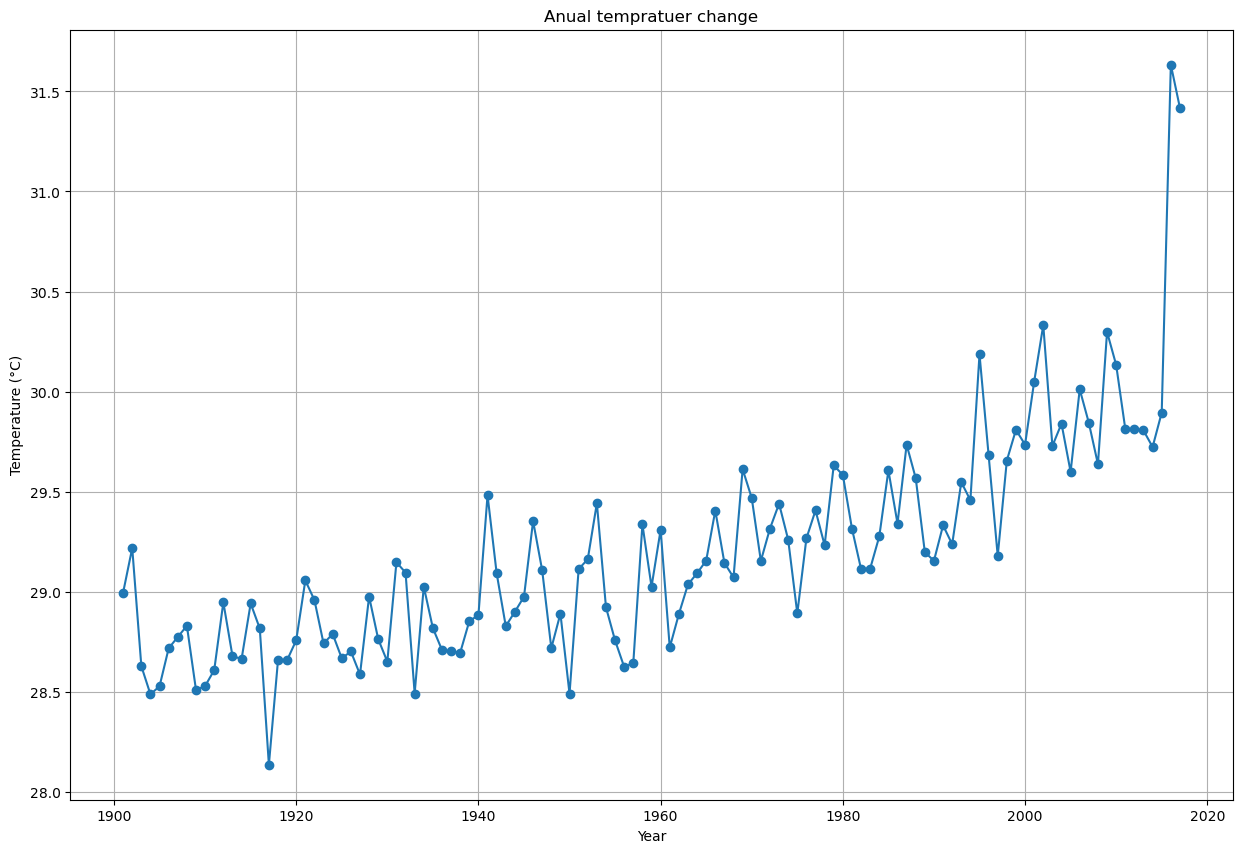

In [72]:
plt.figure(figsize = (15,10))
plt.plot(anual_temp,marker = 'o')
plt.title("Anual tempratuer change")
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)

In [73]:
df3 = df2['temperature']

In [79]:
df3.shape

(1404,)

# Scaling on temperature column

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()
df4 = scaler.fit_transform(np.array(df3).reshape(-1,1))

In [82]:
df4

array([[0.02890173],
       [0.15462428],
       [0.51083815],
       ...,
       [0.74349711],
       [0.54913295],
       [0.37427746]])

In [84]:
# split the data into train and test data
train_size = int(len(df4) * 0.65)
test_size = len(df4) - train_size 
train_data  = df4[:train_size,:]
test_data = df4[train_size:,:]

In [85]:
train_size , test_size

(912, 492)

In [86]:
train_data.shape, test_data.shape

((912, 1), (492, 1))

In [110]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
    xdata ,ydata = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        b = dataset[i+time_step,0]
        xdata.append(a)
        ydata.append(b)
        
    return np.array(xdata), np.array(ydata)

In [114]:
X_train, y_train = create_dataset(train_data, 100)
X_test, y_test = create_dataset(test_data, 100)

In [117]:
X_train.shape, y_train.shape

((811, 100), (811,))

In [118]:
X_test.shape, y_test.shape

((391, 100), (391,))

In [119]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [120]:
X_train.shape, X_test.shape

((811, 100, 1), (391, 100, 1))

In [121]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [122]:
model = Sequential()
model.add(LSTM(50, input_shape = (100,1),return_sequences = True)) # Keep 3D output
model.add(LSTM(50)) # Now this LSTM layer gets proper 3D input
model.add(Dense(1))

model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

C:\Users\pavan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [123]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 100, verbose = 1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 274ms/step - loss: 0.0019 - val_loss: 0.0042
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - loss: 0.0020 - val_loss: 0.0073
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - loss: 0.0024 - val_loss: 0.0038
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 315ms/step - loss: 0.0025 - val_loss: 0.0053
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 256ms/step - loss: 0.0022 - val_loss: 0.0044
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 304ms/step - loss: 0.0024 - val_loss: 0.0064
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - loss: 0.0023 - val_loss: 0.0043
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - loss: 0.0023 - val_loss: 0.0064
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - loss: 0.0021 - val_loss: 0.0061
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4

In [128]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [129]:
### Calculate RMSE performance metrics for train predict
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

0.04314818758530635

In [130]:
### Calculate RMSE performance metrics for test predict
math.sqrt(mean_squared_error(y_test, test_predict))

0.06701083538299883

In [133]:
len(test_data)

492

In [134]:
#taking previous 100 days data to predict next 30 days price
x_input=test_data[392:].reshape(1,-1)
x_input.shape

(1, 100)

In [135]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.6936416184971095,
 0.6322254335260111,
 0.40390173410404606,
 0.25505780346820806,
 0.2088150289017341,
 0.3634393063583814,
 0.7182080924855487,
 0.872109826589595,
 0.8981213872832368,
 0.8106936416184967,
 0.6676300578034677,
 0.6336705202312136,
 0.6249999999999996,
 0.6119942196531789,
 0.4342485549132946,
 0.20809248554913262,
 0.15751445086705185,
 0.3229768786127165,
 0.5903179190751442,
 0.700867052023121,
 0.8908959537572247,
 0.796242774566474,
 0.6799132947976876,
 0.644508670520231,
 0.6365606936416182,
 0.6394508670520231,
 0.45592485549132933,
 0.2601156069364161,
 0.11632947976878594,
 0.3208092485549132,
 0.5924855491329475,
 0.7557803468208091,
 0.8887283236994215,
 0.8381502890173409,
 0.7138728323699417,
 0.6473988439306355,
 0.6249999999999996,
 0.5924855491329475,
 0.4414739884393062,
 0.24132947976878594,
 0.18497109826589564,
 0.33164739884393035,
 0.6228323699421963,
 0.7702312138728318,
 0.90028901734104,
 0.7543352601156066,
 0.6553468208092483,
 0.6329479

In [149]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
prediction_30_days = []
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        prediction_30_days.append(yhat)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        prediction_30_days.append(yhat)
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 month input [0.58256447 0.57497942 0.49596307 0.32075813 0.1404935  0.10051941
 0.25191122 0.49117565 0.69551837 0.79395026 0.7307356  0.6194545
 0.58256066 0.57440609 0.49324536 0.31666419 0.13791469 0.10196584
 0.25654572 0.49604422 0.69886357 0.79424411 0.72827554 0.61786395
 0.58251101 0.57375443 0.49042693 0.31248945 0.1353128  0.10343581
 0.26119742 0.50091177 0.70219022 0.7944662  0.72577429 0.6162793
 0.58245081 0.5730496  0.48754385 0.30828574 0.13274461 0.10497089
 0.26588044 0.50576997 0.70548481 0.79461247 0.7232489  0.61472368
 0.58239508 0.57230264 0.48461044 0.30407402 0.13023286 0.1065851
 0.27059707 0.51061416 0.70874155 0.79468155 0.72070712 0.61320448
 0.58234745 0.57151705 0.48163179 0.29986182 0.12778668 0.10828353
 0.27534652 0.5154407  0.71195632 0.79467314 0.71815246 0.61172372
 0.58230865 0.57069296 0.47860882 0.29565114 0.12540942 0.11006819
 0.2801277  0.52024764 0.7151264  0.79458582 0.71558672 0.61028343
 0.58227849 0.56982988 0.47554195 0.2914443  0.1231

In [154]:
prediction_30_days = np.array(prediction_30_days).reshape(30,)

In [159]:
prediction_30_days = scaler.inverse_transform(prediction_30_days.reshape(-1,1)) 

In [160]:
prediction_30_days = np.array(prediction_30_days).reshape(30,)

In [161]:
prediction_30_days

array([23.672848, 23.576338, 26.01054 , 29.332375, 31.983152, 32.991356,
       31.832365, 30.408144, 30.058199, 29.860912, 28.494822, 25.917387,
       23.642977, 23.604631, 26.077915, 29.397976, 32.025043, 32.98686 ,
       31.796577, 30.389912, 30.05806 , 29.847307, 28.450602, 25.85945 ,
       23.61415 , 23.634108, 26.145647, 29.463243, 32.06625 , 32.981277],
      dtype=float32)

In [166]:
len(df4)

1404

In [167]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

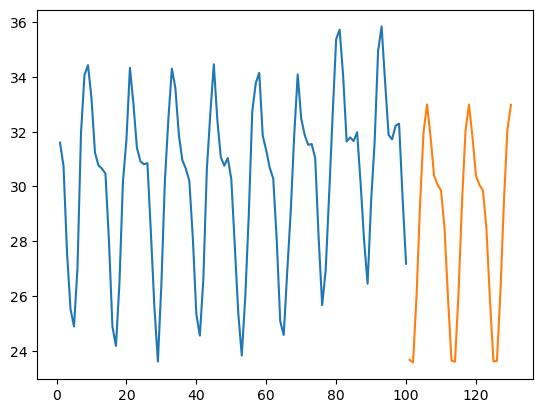

In [169]:
plt.plot(day_new,scaler.inverse_transform(df4[1304:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))